In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("../data/Temperatures/GlobalTemperatures.csv")

In [3]:
data.head(5)

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN

In [4]:
data.shape

(3192, 9)

In [5]:
data.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [6]:
data.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

### Average Temperature in each season

Since we have the date , lets have a look at average temperature for each season by conisdering `LandAverageTemperature`

In [7]:
#create a new dataframe with date and temperature
avg_temp = data[['dt','LandAverageTemperature']]

#converting dt column to datetime
avg_temp['dt'] = pd.to_datetime(avg_temp['dt'])
avg_temp['Year'] = avg_temp['dt'].map(lambda x: x.year)
avg_temp['Month'] = avg_temp['dt'].map(lambda x: x.month)

#function for getting season based on month
def get_season(month):
    if month >= 3 and month <= 5:
        return 'Spring'
    elif month >= 6 and month <= 8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Autumn'
    else:
        return 'Winter'
    
min_year = avg_temp['Year'].min()
max_year = avg_temp['Year'].max()
years = range(min_year, max_year + 1)
    
avg_temp['Season'] = avg_temp['Month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    years_data = avg_temp[avg_temp['Year'] == year]
    spring_temps.append(years_data[years_data['Season'] == 'Spring']['LandAverageTemperature'].mean())
    summer_temps.append(years_data[years_data['Season'] == 'Summer']['LandAverageTemperature'].mean())
    autumn_temps.append(years_data[years_data['Season'] == 'Autumn']['LandAverageTemperature'].mean())
    winter_temps.append(years_data[years_data['Season'] == 'Winter']['LandAverageTemperature'].mean())

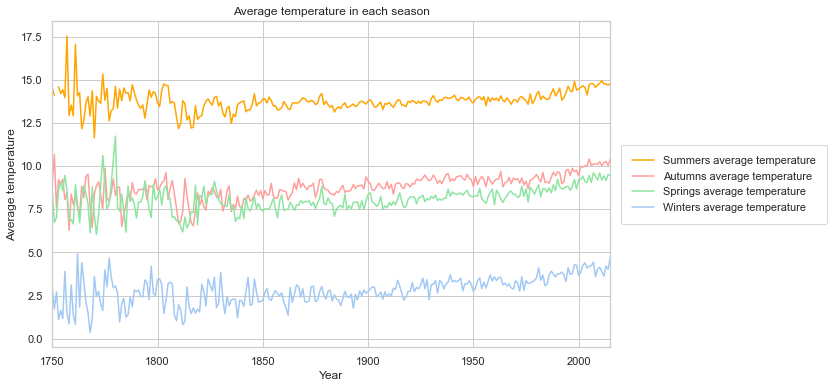

In [18]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, summer_temps, label='Summers average temperature', color='orange')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='r')
plt.plot(years, spring_temps, label='Springs average temperature', color='g')
plt.plot(years, winter_temps, label='Winters average temperature', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

Globaltemperatures.csv is analyzed using <b>pandas_profiling</b>, a very useful tool that extends `df.info()` functionality in pandas
As the name suggests it generates profile reports from a pandas Dataframe for each feature and also very interactive

In [9]:
profile=ProfileReport(data, title="Pandas Profiling Report",explorative=True,dark_mode=True, progress_bar=False)

In [17]:
profile.to_file("global_temperature_report.html")

Please open the notebook in <a href="https://nbviewer.jupyter.org/">nbviewer</a> to view the report, For some reason github  wouldn't let me host this report but It would work fine when u just copy the current path from browser and paste it in the above mentioned site.

In [11]:
ProfileReport(data)

As described in the report, the dataset contains 9 variables, 8 are numerical and 1 is  categorical (we will probably need to get dummy variables for those when modelling).

The Warning tab gives us various details about correaltion about the features, also it gives us details about missing values for each column

`LandMaxTemperature` is highly correlated with almost 3 other columns and has lot of missing values, same is the case with `LandMinTemperature` and `LandOceanAverageTemperature` and hence we will drop these features and uncertainities associated with them to avoid multi collinearity problems and consider only `LandAverageTemperature` and `LandAverageTemperatureUnCertainty`

In [12]:
#generating a random sample because from the report it just gives the head of data, so we would take sample
#to generate random slice of data
data.sample(5)

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
2509  1959-02-01                   3.330                              0.126   
985   1832-02-01                   1.833                              1.656   
2581  1965-02-01                   3.036                              0.084   
679   1806-08-01                  14.593                              1.361   
2014  1917-11-01                   5.820                              0.226   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
2509               9.004                          0.136              -2.225   
985                  NaN                            NaN                 NaN   
2581               8.907                          0.078              -2.822   
679                  NaN                            NaN                 NaN   
2014              11.686                          0.253               0.057   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
2509                          0.129                          13.873   
985                             NaN                             NaN   
2581                          0.187                          13.698   
679                             NaN                             NaN   
2014                          0.266                          14.002   

      LandAndOceanAverageTemperatureUncertainty  
2509                                      0.072  
985                                         NaN  
2581                                      0.061  
679                                         NaN  
2014                                      0.138

In [13]:
#considering only average temperature and landaveragetemperatureuncertainty
avg_temp['AverageUncertainty'] = data['LandAverageTemperatureUncertainty']

#uncertanity here generally is the confidence interval around Aevrage temperature, using this we can get maxAvgtemp 
#and minAvgTemp
avg_temp['maxAvgTemp'] = avg_temp['LandAverageTemperature']+avg_temp['AverageUncertainty']
avg_temp['minAvgTemp'] = avg_temp['LandAverageTemperature']-avg_temp['AverageUncertainty']

avg_temp = avg_temp.groupby(avg_temp['dt'].map(lambda x:x.year)).mean().reset_index()
min_year = avg_temp['dt'].min()
max_year = avg_temp['dt'].max()

In [14]:
avg_temp

dt  LandAverageTemperature    Year  Month  AverageUncertainty  \
0    1750                8.719364  1750.0    6.5            2.637818   
1    1751                7.976143  1751.0    6.5            2.781143   
2    1752                5.779833  1752.0    6.5            2.977000   
3    1753                8.388083  1753.0    6.5            3.176000   
4    1754                8.469333  1754.0    6.5            3.494250   
..    ...                     ...     ...    ...                 ...   
261  2011                9.516000  2011.0    6.5            0.082000   
262  2012                9.507333  2012.0    6.5            0.083417   
263  2013                9.606500  2013.0    6.5            0.097667   
264  2014                9.570667  2014.0    6.5            0.090167   
265  2015                9.831000  2015.0    6.5            0.092167   

     maxAvgTemp  minAvgTemp  
0     11.357182    6.081545  
1     10.757286    5.195000  
2      8.756833    2.802833  
3     11.564083    5.212083  
4     11.963583    4.975083  
..          ...         ...  
261    9.598000    9.434000  
262    9.590750    9.423917  
263    9.704167    9.508833  
264    9.660833    9.480500  
265    9.923167    9.738833  

[266 rows x 7 columns]

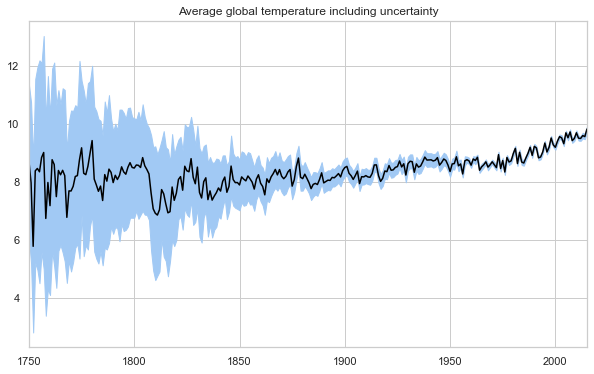

In [15]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
_, ax=plt.subplots(figsize=(10, 6))

plt.plot(avg_temp['Year'], avg_temp['LandAverageTemperature'], color='black')
ax.fill_between(avg_temp['Year'], avg_temp['minAvgTemp'], avg_temp['maxAvgTemp'], color='b')

plt.xlim(min_year, max_year)
ax.set_title('Average global temperature including uncertainty')

plt.show()

We can see that majority of data below 1900 is not stable, let us consider data from 1950 around the average temperature and uncertainty

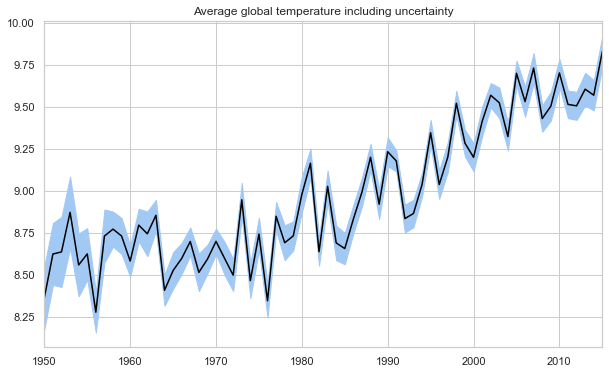

In [16]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
_, ax=plt.subplots(figsize=(10, 6))

avg_temp_1950 = avg_temp[avg_temp['Year']>=1950]

plt.plot(avg_temp_1950['Year'], avg_temp_1950['LandAverageTemperature'], color='black')
ax.fill_between(avg_temp_1950['Year'], avg_temp_1950['minAvgTemp'], avg_temp_1950['maxAvgTemp'], color='b')

min_year_1950 = avg_temp_1950['Year'].min()
max_year_1950 = avg_temp_1950['Year'].max()

plt.xlim(min_year_1950, max_year_1950)
ax.set_title('Average global temperature including uncertainty')

plt.show()